In [2]:
from sklearn.cluster import KMeans
import numpy as np
import nsepy
import datetime
import ta
import pandas as pd
from pandas_datareader import data
import random

In [68]:
X=pd.read_csv('DJI.csv')
X

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-10-19,10142.980469,10014.610352,10014.610352,10142.980469,343710000,10142.980469
1,2000-10-20,10229.549805,10067.509766,10141.129883,10226.589844,319750000,10226.589844
2,2000-10-23,10361.250000,10216.230469,10230.290039,10271.719727,339180000,10271.719727
3,2000-10-24,10439.309570,10273.570312,10273.570312,10393.070312,274990000,10393.070312
4,2000-10-25,10461.969727,10306.589844,10395.660156,10326.480469,312490000,10326.480469
...,...,...,...,...,...,...,...
4572,2018-12-24,22339.869141,21792.199219,22317.279297,21792.199219,308420000,21792.199219
4573,2018-12-26,22878.919922,21712.529297,21857.730469,22878.449219,433080000,22878.449219
4574,2018-12-27,23138.890625,22267.419922,22629.060547,23138.820312,407940000,23138.820312
4575,2018-12-28,23381.880859,22981.330078,23213.609375,23062.400391,336510000,23062.400391


In [69]:
def data_preprocessing():
    X=pd.read_csv('DJI.csv')
 
    X['c-o']=(X.Close-X.Open)/X.Open*100
    X['candle']=np.where(X['c-o'].values<-2,0,np.where(X['c-o'].values<-1,1,np.where(X['c-o'].values<0,2,np.where(X['c-o'].values<1,3,np.where(X['c-o'].values<2,4,5))))) #This line updates the value of candle column based on the value of corresponding c-o. If c-o <2 it is 4 else it is 5. if c-o<1 it is 3 else it goes to previous condition and so on.
    X['rsi']=ta.momentum.RSIIndicator(X["Close"], window=14).rsi()   #used to indicate how hot a stock is
    X['r']=ta.momentum.WilliamsRIndicator(X["High"], X["Low"], X["Close"], lbp=14).williams_r()   #calcuting williams%r
    X['cci']=ta.trend.CCIIndicator(X["High"], X["Low"], X["Close"], window=20, constant=0.015).cci()  #calculating CCI
    X = X.dropna(axis = 0, how ='any') #drop rows with missing values meaning if row has 'any ' empty values drop it
    X = X.reset_index()

    X = X.reset_index()
    X['cash']=0
    X['action']=""
    X['action1']=""
    return X

In [70]:
X=data_preprocessing()
X

,index,Date,High,Low,Open,Close,Volume,Adj Close,c-o,candle,rsi,r,cci,cash,action,action1
0,0,2000-10-19,10142.980469,10014.610352,10014.610352,10142.980469,343710000,10142.980469,1.281828,4,NaN,NaN,NaN,0,,
1,1,2000-10-20,10229.549805,10067.509766,10141.129883,10226.589844,319750000,10226.589844,0.842707,3,NaN,NaN,NaN,0,,
2,2,2000-10-23,10361.250000,10216.230469,10230.290039,10271.719727,339180000,10271.719727,0.404971,3,NaN,NaN,NaN,0,,
3,3,2000-10-24,10439.309570,10273.570312,10273.570312,10393.070312,274990000,10393.070312,1.163179,4,NaN,NaN,NaN,0,,
4,4,2000-10-25,10461.969727,10306.589844,10395.660156,10326.480469,312490000,10326.480469,-0.665467,2,NaN,NaN,NaN,0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,4572,2018-12-24,22339.869141,21792.199219,22317.279297,21792.199219,308420000,21792.199219,-2.352796,0,21.016548,-100.000000,-207.592307,0,,
4573,4573,2018-12-26,22878.919922,21712.529297,21857.730469,22878.449219,433080000,22878.449219,4.669830,5,37.449406,-65.536832,-135.495822,0,,
4574,4574,2018-12-27,23138.890625,22267.419922,22629.060547,23138.820312,407940000,23138.820312,2.252678,5,40.637540,-57.840581,-93.308686,0,,
4575,4575,2018-12-28,23381.880859,22981.330078,23213.609375,23062.400391,336510000,23062.400391,-0.651381,2,39.993237,-56.676021,-63.855474,0,,


Populating the interactive namespace from numpy and matplotlib


c:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


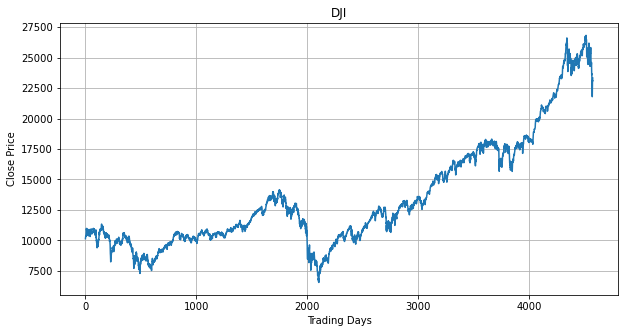

In [71]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('pylab', 'inline')
fig = plt.figure()
ax=X.loc[1:4577,'Close'].plot(grid="True",figsize=(10,5), title='DJIA',color="r")
ax.set_xlabel("Trading Days")
ax.set_ylabel("Close Price")
plt.savefig("IMAGES/DJIA.png")
plt.show()

In [72]:
def predictor(djia,i):  #To predit when to sell or buy or hold
    sbh=[0,0,0]
    #0-hold 1-buy 2-sell
    rsi=djia['rsi'][:i+1]
    if(rsi[i]>=70):
        sbh[0]=2  #better to sell due to being overbought
    elif (rsi[i]<=30):
         sbh[0]=1  #better to buy due to oversold
    else:
         sbh[0]=0  #do nothing
    r=djia['r'][:i+1]
    if(r[i]>=-20):
        sbh[1]=2
    elif (r[i]<=-80):
         sbh[1]=1
    else:
         sbh[1]=0
    cci=djia['cci'][:i+1]
    if(cci[i]<=-100):
        sbh[2]=2
    elif (cci[i]>=100):
         sbh[2]=1
    else:
         sbh[2]=0
    return sbh
    

In [73]:
def obtainState(t):    
    return(X['candle'][t])  

In [74]:
class Testing_Agent:
    def __init__(self):
        self.gamma = np.load('C:\Python\RL PROJECT CODE\MODEL2-TRAINING\Gamma/gamma200.npy')
        self.Q = np.load('C:\Python\RL PROJECT CODE\MODEL2-TRAINING\Qtable/Qtable200.npy')
        self.learning_rate=np.load('C:\Python\RL PROJECT CODE\MODEL2-TRAINING\Learning_Rate/learning_rate200.npy')
        self.epsilon = np.load('C:\Python\RL PROJECT CODE\MODEL2-TRAINING\Epsilon/epsilon200.npy')
        
    def obtainAction(self,state):
        a=[1,0,2]
        if np.random.rand() <= self.epsilon: #compares random numbers between -1 to 1 to epsilon value at that point of time.
            return random.choice(a) #if true, choose a random value of a.
        return np.argmax(self.Q[state,])  #else, choose the action with highest state value 1-epsilon times(acc to epsilon greedy algo)
    
    # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
    def updateQtable(self,state,action,reward,next_state,next_action):
            self.Q[state,action]= self.Q[state,action] + self.learning_rate * (reward + self.gamma * np.max(self.Q[next_state, :])
                                                                - self.Q[state,action])


In [76]:
total_profit=0
maxprofit=-1000000
episode_count=1
random.seed(101)
agent=Testing_Agent()
m1=0
m2=0
for e in range(1,episode_count+1):  #running loop for episode number of times
    data_djia=data_preprocessing()  #getting data
    data_length_start= 1305         
    data_length_end=4557                 
    state = obtainState(data_length_start)
    action = agent.obtainAction(state)
    last_action=None  #initially last action is nothing
    last_price=0
    last_quantity=0
    capital=data_djia.loc[data_length_start,'Open']*100
    margin=data_djia.loc[data_length_start,'Open']*100
    broker_rate=0.0010
    total_profit=0    
    print("Episode {}/{}".format(e,episode_count))
    count_pos=0

    for i in range(data_length_start,data_length_end-1):
        z=predictor(data_djia,i)  #in function heading
        z0=z.count(0)  #rsi
        z1=z.count(1)  #williams_r
        z2=z.count(2)  #cci
        y=[z0,z1,z2]
        z3=y.index(max(y)) #maximum of z0,z1,z2 to give the better effect on the stock market based on the previous data. 
        reward=0

        if last_action=='sold':  #If last action was sold 
            totbrokerage=(data_djia.loc[i,'Open']+last_price)*broker_rate
            currprofit=(last_price-data_djia.loc[i,'Open'])*last_quantity
            totprofit1=(currprofit/(last_price*last_quantity))*100
            
            if totprofit1<-10:  #If total profit percentage is less than 10, then we close short to prevent further losses
                total_profit=total_profit+currprofit
                margin=margin+(last_quantity*last_price)+(currprofit)
                data_djia.loc[i,'cash']=margin      
                last_action=None
                data_djia.loc[i,'action']="close short"
                data_djia.loc[i,'action1']="long"
                reward= max((np.log(last_price)-np.log(data_djia.loc[i,'Open'])),0)

        elif last_action=='bought':  #if last action was bought
            totbrokerage=(data_djia.loc[i,'Open']+last_price)*broker_rate
            currprofit=(data_djia.loc[i,'Open']-last_price)*last_quantity
            totprofit1=(currprofit/(last_price*last_quantity))*100

            if totprofit1<-10:   #if total profit percentage is less than 10, then we close long to prevent further losses
                total_profit=total_profit+currprofit
                margin=margin+(last_quantity*last_price)+(currprofit)
                data_djia.loc[i,'cash']=margin        
                last_action=None
                data_djia.loc[i,'action']="close long"
                data_djia.loc[i,'action1']="short"
                reward= max((np.log(data_djia.loc[i,'Open'])-np.log(last_price)),0)               
                          
            
        if action == 1 and z3==1 and last_action==None :  #in long
            data_djia.loc[i,'cash']=margin            
            last_quantity=margin//data_djia.loc[i,'Open']
            margin=margin%data_djia.loc[i,'Open']
            last_price=data_djia.loc[i,'Open']
            last_action='bought'
            data_djia.loc[i,'action']="open long"
            data_djia.loc[i,'action1']="long"
            count_pos+=1

        elif action == 1 and z3==1 and last_action=='sold':  #in close short
            totbrokerage=(data_djia.loc[i,'Open']+last_price)*broker_rate
            currprofit=(last_price-data_djia.loc[i,'Open']-totbrokerage)*last_quantity
            totprofit1=(currprofit/(last_price*last_quantity))*100

            if totprofit1>4 or totprofit1<-4: #to close short
                total_profit=total_profit+currprofit
                margin=margin+(last_quantity*last_price)+(currprofit)
                data_djia.loc[i,'cash']=margin      
                last_action=None
                data_djia.loc[i,'action']="close short"
                data_djia.loc[i,'action1']="long"
                reward= max((np.log(last_price)-np.log(data_djia.loc[i,'Open']+totbrokerage)),0)

            else:
                prof_tot=(last_price-data_djia.loc[i,'Close'])*last_quantity
                original=margin+(last_quantity*last_price)
                data_djia.loc[i,'cash']=original+prof_tot   
                
        elif action == 1 and z3==1 and last_action=='bought': #in hold long
            data_djia.loc[i,'cash']=margin+(last_quantity*data_djia.loc[i,'Close'])

        elif action == 2 and z3==2 and last_action==None and margin>data_djia.loc[i,'Open']:  #in short
            data_djia.loc[i,'cash']=margin        
            last_quantity=margin//data_djia.loc[i,'Open']
            margin=margin%data_djia.loc[i,'Open']
            last_price=data_djia.loc[i,'Open']
            last_action='sold'        #open short
            data_djia.loc[i,'action']="open short"
            data_djia.loc[i,'action1']="short"      
            count_pos+=1

        elif action == 2 and z3==2 and  last_action=='bought':#close long  
            totbrokerage=(data_djia.loc[i,'Open']+last_price)*broker_rate
            currprofit=(data_djia.loc[i,'Open']-last_price-totbrokerage)*last_quantity
            totprofit1=(currprofit/(last_price*last_quantity))*100
            if totprofit1>4 or totprofit1<-4: #closing long
                total_profit=total_profit+currprofit
                margin=margin+(last_quantity*last_price)+(currprofit)
                data_djia.loc[i,'cash']=margin        
                last_action=None
                data_djia.loc[i,'action']="close long"
                data_djia.loc[i,'action1']="short"
                reward= max((np.log(data_djia.loc[i,'Open'])-np.log(last_price+totbrokerage)),0)

            else:
                data_djia.loc[i,'cash']=margin+(last_quantity*data_djia.loc[i,'Close']) 
                
            
        elif action == 2 and z3==2 and last_action=='sold':   #in hold short
            prof_tot=(last_price-data_djia.loc[i,'Close'])*last_quantity
            original=margin+(last_quantity*last_price)
            data_djia.loc[i,'cash']=original+prof_tot

        else:            
            if last_action==None:
                data_djia.loc[i,'cash']=margin  #in hold 1

            elif last_action=='bought': #in hold 2
                data_djia.loc[i,'cash']=margin+(last_quantity*data_djia.loc[i,'Close']) 

            elif last_action=='sold': #in hold 3
                prof_tot=(last_price-data_djia.loc[i,'Close'])*last_quantity
                original=margin+(last_quantity*last_price)
                data_djia.loc[i,'cash']=original+prof_tot     
                                       
              
        next_state=obtainState(i+1)  #getting the next state
        next_action=agent.obtainAction(next_state)  #getting the next action
        agent.updateQtable(state,action,reward,next_state,next_action)  #updating the Qtable
        state=next_state
        action=next_action
        
        if i==data_length_end-2:  #if we are last but one row, then we update the last row depending on last action and print results
                print("--------------------------------\n")
                if  last_action=='sold':  #close short
                    totbrokerage=(data_djia.loc[i,'Close']+last_price)*broker_rate
                    currprofit=(last_price-data_djia.loc[i,'Close']-totbrokerage)*last_quantity
                    total_profit=total_profit+currprofit
                    margin=margin+(last_quantity*last_price)+(currprofit) 
                    data_djia.loc[i,'cash']=margin 
                    last_action=None
                    #close short.loc[i,'action']="close short"
                    #close short.loc[i,'action1']="long"

                elif last_action=='bought':  #in close long
                    totbrokerage=(data_djia.loc[i,'Close']+last_price)*broker_rate
                    currprofit=(data_djia.loc[i,'Close']-last_price-totbrokerage)*last_quantity
                    total_profit=total_profit+currprofit
                    maxprofit=max(maxprofit,total_profit)
                    total_profit+=total_profit
                    margin=margin+(last_quantity*last_price)+(currprofit) 
                    data_djia.loc[i,'cash']=margin
                    last_action=None
                    data_djia.loc[i,'action']="close long"
                    data_djia.loc[i,'action1']="short"

                print("***********************")
                print("Total Profit is ",total_profit)
                print("Initial Capital is ",capital)    
                print("Current Capital is ",margin)
                roi=((margin-capital)/capital)*100
                print("Percentage return of interest is ",roi)
                buyandhold=((data_djia.loc[i,'Close']-data_djia.loc[data_length_start,'Close'])/data_djia.loc[data_length_start,'Close'])*100
                print("Percentage Buy and Hold is ",buyandhold)
                print("Count of state changes is: ",count_pos)
                print("The Q table is: ",agent.Q)
                print("Value of Epsilon is ",agent.epsilon)
                print("--------------------------------")
                       
    
    m3=roi
    if m3>m2:  
        m1=e
        m2=m3   

print("e={},roi={}".format(m1,m2))
print("Maximum profit is {}".format(maxprofit))
print("Total profit is {}".format(total_profit))        
       
    #To save model            
    np.save('C:\Python\RL PROJECT CODE\MODEL2-TESTING\Qtable/Qtable'+ str('test')+ str(e)+str('.npy'), agent.Q)
    np.save('C:\Python\RL PROJECT CODE\MODEL2-TESTING\Epsilon/epsilon'+ str('test')+ str(e)+str('.npy'), agent.epsilon)
    np.save('C:\Python\RL PROJECT CODE\MODEL2-TESTING\Gamma/gamma'+ str('test')+ str(e)+str('.npy'), agent.gamma)
    np.save('C:\Python\RL PROJECT CODE\MODEL2-TESTING\Learning_Rate/learning_rate'+ str('test')+ str(e)+str('.npy'), agent.learning_rate)
    X.to_csv('C:\Python\RL PROJECT CODE\MODEL2-TESTING\AfterTest/AfterTest'+str(e)+str('.csv'))

Episod 1/1
--------------------------------

***********************
Profit is  19346.73721582032
Initial Capital is  1071829.98046875
Current Capital is  1091176.7176845705
%ROI is  1.8050192258439572
% Buy and Hold= 113.31193325595792
count 18
qtable [[0.00165828 0.00730093 0.00147067]
 [0.00073959 0.00073521 0.00077549]
 [0.00035929 0.00028909 0.00028723]
 [0.00026842 0.0004264  0.00026699]
 [0.00065044 0.00066163 0.00065195]
 [0.00140939 0.00216879 0.0035898 ]]
epsilon 0.00998645168764533
--------------------------------
e=1,roi=1.8050192258439572


In [77]:
agent.Q

array([[0.00165828, 0.00730093, 0.00147067],
       [0.00073959, 0.00073521, 0.00077549],
       [0.00035929, 0.00028909, 0.00028723],
       [0.00026842, 0.0004264 , 0.00026699],
       [0.00065044, 0.00066163, 0.00065195],
       [0.00140939, 0.00216879, 0.0035898 ]])

Populating the interactive namespace from numpy and matplotlib


c:\python\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


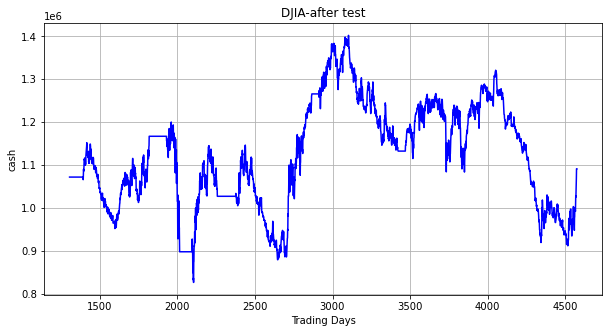

In [78]:
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('pylab', 'inline')
fig = plt.figure()
ax=X.loc[data_length_start:data_length-2,'cash'].plot(grid="True",figsize=(10,5), title='DJIA-after test',color="b")
ax.set_xlabel("Trading Days")
ax.set_ylabel("cash")
plt.savefig("IMAGES/Test.png")
plt.show()
#fig.savefig('baroda_close.png')

In [5]:
help(ta.trend.cci)

Help on function cci in module ta.trend:

cci(high, low, close, window=20, constant=0.015, fillna=False)
    Commodity Channel Index (CCI)
    
    CCI measures the difference between a security's price change and its
    average price change. High positive readings indicate that prices are well
    above their average, which is a show of strength. Low negative readings
    indicate that prices are well below their average, which is a show of
    weakness.
    
    http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:commodity_channel_index_cci
    
    Args:
        high(pandas.Series): dataset 'High' column.
        low(pandas.Series): dataset 'Low' column.
        close(pandas.Series): dataset 'Close' column.
        window(int): n periods.
        constant(int): constant.
        fillna(bool): if True, fill nan values.
    
    Returns:
        pandas.Series: New feature generated.



In [7]:
z3

2